# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 1.2MB/s 
     |████████████████████████████████| 3.8MB 58.3MB/s 
     |████████████████████████████████| 450kB 46.8MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path =  '/content/drive/My Drive/NLP/' 
data_file = project_path + 'Data-20200229T003531Z-001/Data/Sarcasm_Headlines_Dataset.json'## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 8 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import pandas as pd
data_json = pd.read_json(data_file, typ = 'frame', lines = True)

data_json.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [5]:
data_json.shape

(26709, 3)

In [0]:
#data_json.describe().transpose()

In [7]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


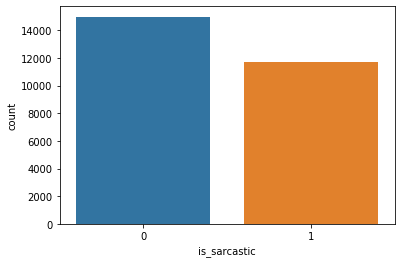

In [8]:
import seaborn as sns
sns.countplot('is_sarcastic', data = data_json)

## Drop `article_link` from dataset. ( 4 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [0]:
df = data_json.drop('article_link', axis = 1)

## Get the Length of each line and find the maximum length. ( 8 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [0]:
textLen = []

for headline in df['headline']:
  textLen.append(len(headline))

max_len = max(textLen)


In [11]:
df['headline'] = [str(i).rjust(max_len, ' ') for i in df['headline']] 

print(df['headline'][0])

                                                                                                                                                                                former versace store clerk sues over secret 'black code' for minority shoppers


#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

## Set Different Parameters for the model. ( 4 marks)

In [0]:
max_features = 10000
maxlen = max_len## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 8 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features)

In [0]:
tokenizer.fit_on_texts(df['headline'])

## Define X and y for your model

In [16]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 4 marks)
Hint : You can use tokenizer.word_index.

In [17]:
num_words = len(tokenizer.word_index)

print(num_words)

29656


#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "Data-20200229T003531Z-001/Data/glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [21]:
embedding_matrix = np.zeros((num_words,embedding_size))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i-1] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 14 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [22]:

### Embedding layer for hint 

model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5931200   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dense (Dense)                (None, None, 64)          16448     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 32)          2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 16)          5

## Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 10 marks)


In [23]:
batch_size = 100
epochs = 5
validation_split = 0.2
 ## Add your code here ##

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-5, verbose=1, mode="min")

In [24]:
history = model.fit(x=X, y =y, validation_split=.2, epochs = 5, batch_size = 100, verbose = 1, callbacks=[stop,checkpoint,reduce_lr], shuffle=True)
#history = model.fit(x=X, y =y, validation_split=.2, epochs = 5, batch_size = 100, verbose = 1, shuffle=True)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21300/21367 [============================>.] - ETA: 1s - loss: 0.6875 - accuracy: 0.5573
Epoch 00001: loss improved from inf to 0.68753, saving model to model-0.69.h5
21367/21367 [==============================] - 449s 21ms/sample - loss: 0.6875 - accuracy: 0.5574 - val_loss: 0.6836 - val_accuracy: 0.5680
Epoch 2/5
21300/21367 [============================>.] - ETA: 1s - loss: 0.6617 - accuracy: 0.6042
Epoch 00002: loss improved from 0.68753 to 0.66171, saving model to model-0.66.h5
21367/21367 [==============================] - 446s 21ms/sample - loss: 0.6617 - accuracy: 0.6046 - val_loss: 0.5836 - val_accuracy: 0.7665
Epoch 3/5
21300/21367 [============================>.] - ETA: 1s - loss: 0.4296 - accuracy: 0.8281
Epoch 00003: loss improved from 0.66171 to 0.42940, saving model to model-0.43.h5
21367/21367 [==============================] - 456s 21ms/sample - loss: 0.4294 - accuracy: 0.8281 - val_loss: 0.3696 - val_accuracy:

In [25]:
print("Validation Accuracy: ")
print(history.history['val_accuracy'])

Validation Accuracy: 
[0.5679521, 0.76654845, 0.8432427, 0.84755915, 0.8454081]
